In [2]:
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def get_boundaries(file):
    count4 = 0
    count6 = 0
    with open('processed_data/innings/' + file, 'r') as rf:
#         print(rf.readlines())
        try:
            data = json.load(rf)
        except Exception as e:
            return (0,0)
        for item in data:
#             print(item.keys())
            details = list(item.values())
#             print(list(details))
            runs = details[0]['runs']['batsman']
            if runs == 4:
                count4 += 1
            elif runs == 6:
                count6 += 1
                
    return (count4, count6)
            
            

In [4]:
def get_runs_scored(file):
    runs = 0
    with open('processed_data/innings/' + file, 'r') as rf:
        try:
            data = json.load(rf)
        except Exception as e:
            return 0
        for item in data:
            details = list(item.values())
            runs += details[0]['runs']['total']
            
        return runs

In [5]:
columns=['name','id','toss','toss_decision','fours','sixes', 'runs_scored','win', 'date', 'man_of_the_match']
match_data = pd.DataFrame()
for f in os.listdir('processed_data/matches'):
    file = 'processed_data/matches/'+ f
    with open(file, 'r') as rf:
        data = json.load(rf)
        inn_id = data['id']
        team1 = []
        team2= []
        team1.append(data['team1'])
        team2.append(data['team2'])
        team1.append(data['id'])
        team2.append(data['id'])
        if data['toss_winner'] == team1[0]:
            team1.append(1)
            team2.append(0)
            team1.append(data['toss_decision'])
            team2.append('toss lost')
        else:
            team1.append(0)
            team2.append(1)
            team2.append(data['toss_decision'])
            team1.append('toss lost')


        inn_file1 = inn_id + '_1st_inn.json'
        inn_file2 = inn_id + '_2nd_inn.json'
        
        inn1_4, inn1_6 = get_boundaries(inn_file1)
        inn2_4, inn2_6 = get_boundaries(inn_file2)
        inn1 = get_runs_scored(inn_file1)
        inn2 = get_runs_scored(inn_file2)
        if team1[3]!='toss lost':
            if team1[3] == 'field':
                team1.append(inn2_4)
                team1.append(inn2_6)
                team2.append(inn1_4)
                team2.append(inn1_6)
                team1.append(inn2)
                team2.append(inn1)
            else:
                team2.append(inn2_4)
                team2.append(inn2_6)
                team1.append(inn1_4)
                team1.append(inn1_6)
                team1.append(inn1)
                team2.append(inn2)

        else:
            if team2[3] == 'field':
                team2.append(inn2_4)
                team2.append(inn2_6)
                team1.append(inn1_4)
                team1.append(inn1_6)
                team1.append(inn1)
                team2.append(inn2)

            else:
                team1.append(inn2_4)
                team1.append(inn2_6)
                team2.append(inn1_4)
                team2.append(inn1_6)
                team1.append(inn2)
                team2.append(inn1)

                
                
        if data['winner'] == team1[0]:
            team1.append(1)
            team2.append(0)
        else:
            team2.append(1)
            team1.append(0)
        
        team1.append(data['date'])
        team2.append(data['date'])
        
        team1.append(data['player_of_match'])
        team2.append(data['player_of_match'])
        
#         print(team1)
#         print(len(team1), len(team2))
#         df = pd.DataFrame(team1, columns=['name','id','toss','toss_decision','fours','sixes', 'win', 'date', 'man_of_the_match'])
#         print(df)
        match_data = match_data.append(pd.Series(team1, index=columns), ignore_index=True)
        match_data = match_data.append(pd.Series(team2, index=columns), ignore_index=True)
#         print(match_data)
                
    

In [6]:
match_data.head()

,date,fours,id,man_of_the_match,name,runs_scored,sixes,toss,toss_decision,win
0,2017-04-05,17.0,1082591,Yuvraj Singh,Sunrisers Hyderabad,207.0,9.0,0.0,toss lost,1.0
1,2017-04-05,15.0,1082591,Yuvraj Singh,Royal Challengers Bangalore,172.0,8.0,1.0,field,0.0
2,2017-04-06,18.0,1082592,SPD Smith,Rising Pune Supergiant,187.0,6.0,1.0,field,1.0
3,2017-04-06,12.0,1082592,SPD Smith,Mumbai Indians,184.0,11.0,0.0,toss lost,0.0
4,2017-04-07,20.0,1082593,CA Lynn,Gujarat Lions,183.0,6.0,0.0,toss lost,0.0


In [7]:
match_data['name'] = np.where(match_data['name']=='Rising Pune Supergiant', 'Rising Pune Supergiants',match_data['name'])
match_data['name'] = np.where(match_data['name']=='Delhi Daredevils', 'Delhi Capitals',match_data['name'])

In [8]:
man_of_the_match = match_data.groupby('man_of_the_match')
man_of_the_match['man_of_the_match'].count()

man_of_the_match
                      8
A Chandila            2
A Kumble              6
A Mishra             20
A Nehra              12
A Singh               2
A Symonds             6
A Zampa               2
AA Jhunjhunwala       2
AB Dinda              4
AB de Villiers       40
AC Gilchrist         14
AC Voges              2
AD Mascarenhas        2
AD Mathews            2
AD Russell           22
AJ Finch             10
AJ Tye                4
AM Rahane            24
AP Tare               2
AR Patel              8
AS Joseph             2
AS Rajpoot            4
AT Rayudu            18
Azhar Mahmood         4
B Kumar              10
B Lee                 4
B Stanlake            2
BA Bhatt              2
BA Stokes             6
                     ..
SM Pollock            4
SP Goswami            2
SP Narine            18
SPD Smith            10
SR Tendulkar         16
SR Watson            30
SS Iyer               8
ST Jayasuriya         4
SV Samson            10
SW Billings           2

In [9]:
# so there 8 man of the matches with null values let's check them out
match_data[match_data.man_of_the_match=='']

,date,fours,id,man_of_the_match,name,runs_scored,sixes,toss,toss_decision,win
334,2019-04-30,6.0,1178424,,Royal Challengers Bangalore,62.0,3.0,0.0,toss lost,0.0
335,2019-04-30,3.0,1178424,,Rajasthan Royals,41.0,4.0,1.0,field,1.0
820,2011-05-21,3.0,501265,,Delhi Capitals,56.0,2.0,1.0,bat,0.0
821,2011-05-21,0.0,501265,,Pune Warriors,0.0,0.0,0.0,toss lost,1.0
1310,2015-04-29,25.0,829763,,Royal Challengers Bangalore,200.0,5.0,0.0,toss lost,0.0
1311,2015-04-29,0.0,829763,,Rajasthan Royals,0.0,0.0,1.0,field,1.0
1360,2015-05-17,0.0,829813,,Royal Challengers Bangalore,2.0,0.0,1.0,field,0.0
1361,2015-05-17,14.0,829813,,Delhi Capitals,187.0,9.0,0.0,toss lost,1.0


In [10]:
# if you check these match files 1178424, 501265, 829763, 829813 these are no result matches so they don't have man of the matches
# so let's just remove these 
match_data = match_data[match_data.man_of_the_match != '']
match_data.head()

,date,fours,id,man_of_the_match,name,runs_scored,sixes,toss,toss_decision,win
0,2017-04-05,17.0,1082591,Yuvraj Singh,Sunrisers Hyderabad,207.0,9.0,0.0,toss lost,1.0
1,2017-04-05,15.0,1082591,Yuvraj Singh,Royal Challengers Bangalore,172.0,8.0,1.0,field,0.0
2,2017-04-06,18.0,1082592,SPD Smith,Rising Pune Supergiants,187.0,6.0,1.0,field,1.0
3,2017-04-06,12.0,1082592,SPD Smith,Mumbai Indians,184.0,11.0,0.0,toss lost,0.0
4,2017-04-07,20.0,1082593,CA Lynn,Gujarat Lions,183.0,6.0,0.0,toss lost,0.0


#  Team Analysis Across Seasons

In [11]:
match_data['season'] = match_data['date'].apply(lambda x: x.split('-')[0])
match_data.head()

c:\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,fours,id,man_of_the_match,name,runs_scored,sixes,toss,toss_decision,win,season
0,2017-04-05,17.0,1082591,Yuvraj Singh,Sunrisers Hyderabad,207.0,9.0,0.0,toss lost,1.0,2017
1,2017-04-05,15.0,1082591,Yuvraj Singh,Royal Challengers Bangalore,172.0,8.0,1.0,field,0.0,2017
2,2017-04-06,18.0,1082592,SPD Smith,Rising Pune Supergiants,187.0,6.0,1.0,field,1.0,2017
3,2017-04-06,12.0,1082592,SPD Smith,Mumbai Indians,184.0,11.0,0.0,toss lost,0.0,2017
4,2017-04-07,20.0,1082593,CA Lynn,Gujarat Lions,183.0,6.0,0.0,toss lost,0.0,2017


In [12]:
fours_group = match_data.groupby(['season', 'name'])

In [13]:
fours_group = fours_group['fours'].sum()

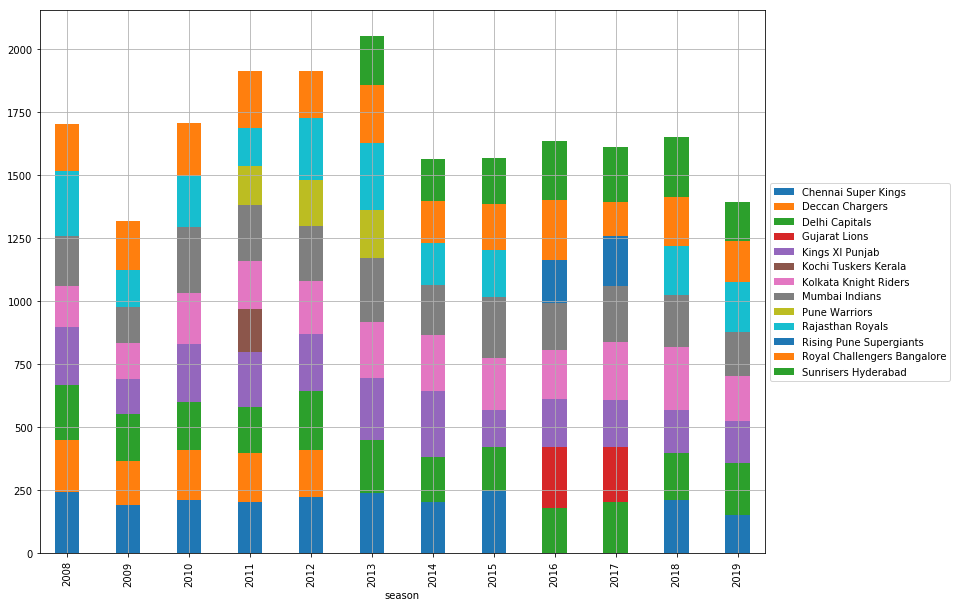

season
2008               Rajasthan Royals
2009            Chennai Super Kings
2010                 Mumbai Indians
2011    Royal Challengers Bangalore
2012               Rajasthan Royals
2013               Rajasthan Royals
2014                Kings XI Punjab
2015            Chennai Super Kings
2016                  Gujarat Lions
2017          Kolkata Knight Riders
2018          Kolkata Knight Riders
2019                 Delhi Capitals
dtype: object


In [14]:
fours_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,10), width=0.4).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(fours_group.unstack().idxmax(axis=1))

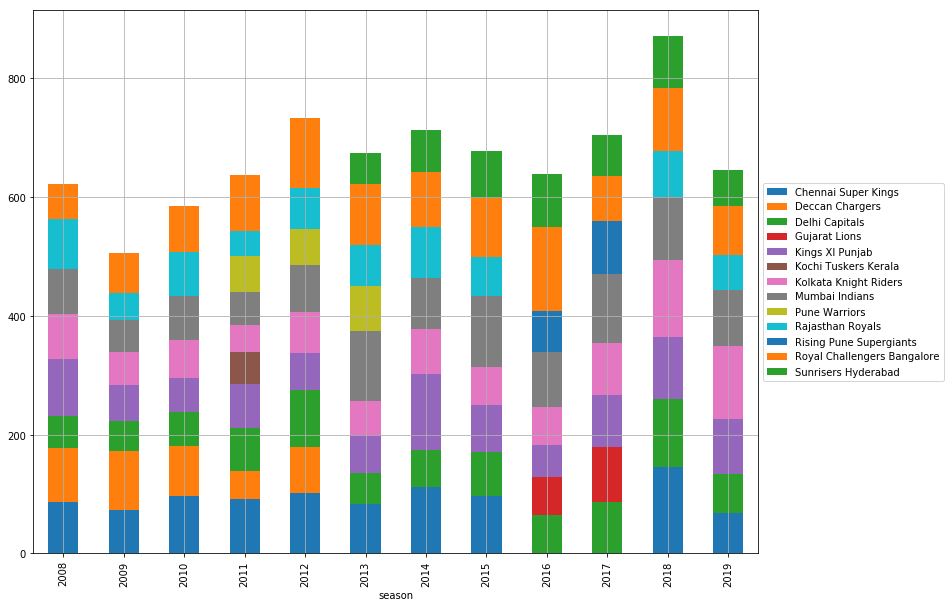

season
2008                Kings XI Punjab
2009                Deccan Chargers
2010            Chennai Super Kings
2011    Royal Challengers Bangalore
2012    Royal Challengers Bangalore
2013                 Mumbai Indians
2014                Kings XI Punjab
2015                 Mumbai Indians
2016    Royal Challengers Bangalore
2017                 Mumbai Indians
2018            Chennai Super Kings
2019          Kolkata Knight Riders
dtype: object


In [15]:
sixes_group = match_data.groupby(['season', 'name'])
sixes_group = sixes_group['sixes'].sum()
sixes_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,10)).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(sixes_group.unstack().idxmax(axis=1))

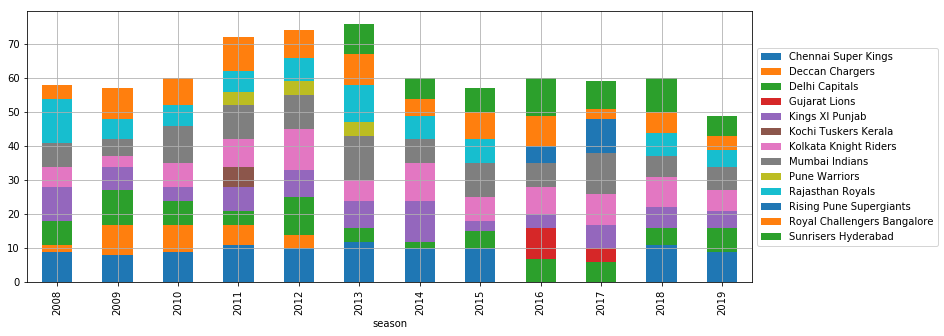

season
2008         Rajasthan Royals
2009           Delhi Capitals
2010           Mumbai Indians
2011      Chennai Super Kings
2012    Kolkata Knight Riders
2013           Mumbai Indians
2014          Kings XI Punjab
2015      Chennai Super Kings
2016      Sunrisers Hyderabad
2017           Mumbai Indians
2018      Chennai Super Kings
2019      Chennai Super Kings
dtype: object


In [16]:
wins_group = match_data.groupby(['season','name'])
wins_group = wins_group['win'].sum()
# wins_group
wins_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,5)).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(wins_group.unstack().idxmax(axis=1))

If you look at the results two of the teams in IPL i.e is MI and CSK have won most matches for 3 and 4 yrs respectively
making them one of the most successful teams of the IPL

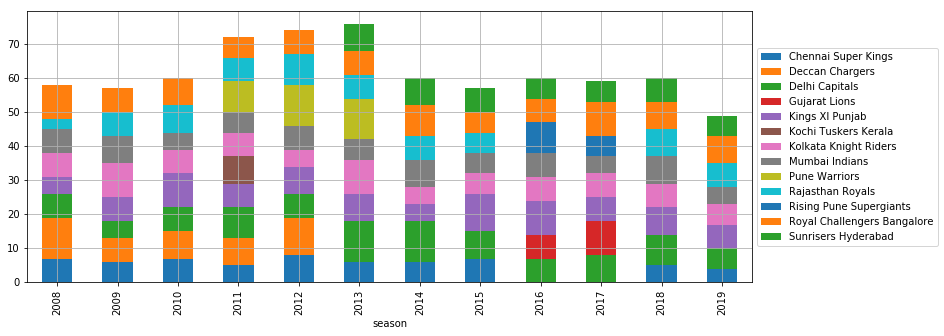

season
2008                Deccan Chargers
2009          Kolkata Knight Riders
2010                Kings XI Punjab
2011                 Delhi Capitals
2012                  Pune Warriors
2013                 Delhi Capitals
2014                 Delhi Capitals
2015                Kings XI Punjab
2016                Kings XI Punjab
2017                  Gujarat Lions
2018                 Delhi Capitals
2019    Royal Challengers Bangalore
dtype: object


In [17]:
losse_data = match_data[match_data['win']==0]
losse_group = losse_data.groupby(['season', 'name'])
losse_group = losse_group['win'].count()
losse_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,5)).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(losse_group.unstack().idxmax(axis=1))

Delhi Capitals have lost most number of matches in 4 seasons.

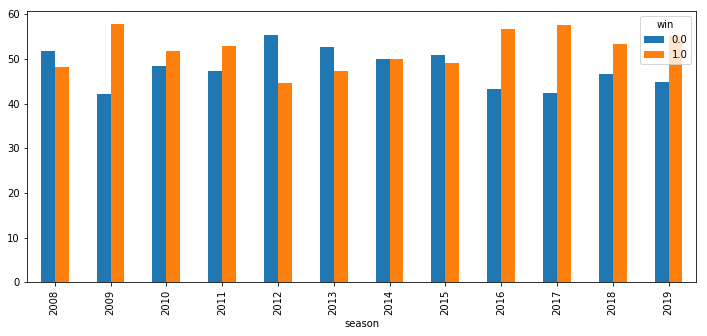

In [18]:
# print(len(match_data[(match_data['toss']==1) & (match_data['win']==1) & (match_data['season']=='2009')]))
tosswin_data = match_data[match_data['toss']==1]
tosswin_data = tosswin_data.groupby(['season'])['win'].value_counts(normalize=True)*100
tosswin_data.unstack().plot(kind='bar', figsize=(12,5))

Well it looks like in the recent 3 - 4 seasons teams those who have won the toss have won more than 50% of the times compared to earlier seasons. So winning toss surely can give you 50% chance of winning the game 

In [19]:
winner_data = match_data.sort_values('date',ascending=False).groupby('season')
for grp, grp_data in winner_data:
    final_match = grp_data.head(2)
    final_match = final_match[final_match['win']==1]
    print('Season: {} ; Winner: {}'.format(final_match['season'].values[0], final_match['name'].values[0]))

Season: 2008 ; Winner: Rajasthan Royals
Season: 2009 ; Winner: Deccan Chargers
Season: 2010 ; Winner: Chennai Super Kings
Season: 2011 ; Winner: Chennai Super Kings
Season: 2012 ; Winner: Kolkata Knight Riders
Season: 2013 ; Winner: Mumbai Indians
Season: 2014 ; Winner: Kolkata Knight Riders
Season: 2015 ; Winner: Mumbai Indians
Season: 2016 ; Winner: Sunrisers Hyderabad
Season: 2017 ; Winner: Mumbai Indians
Season: 2018 ; Winner: Chennai Super Kings
Season: 2019 ; Winner: Chennai Super Kings


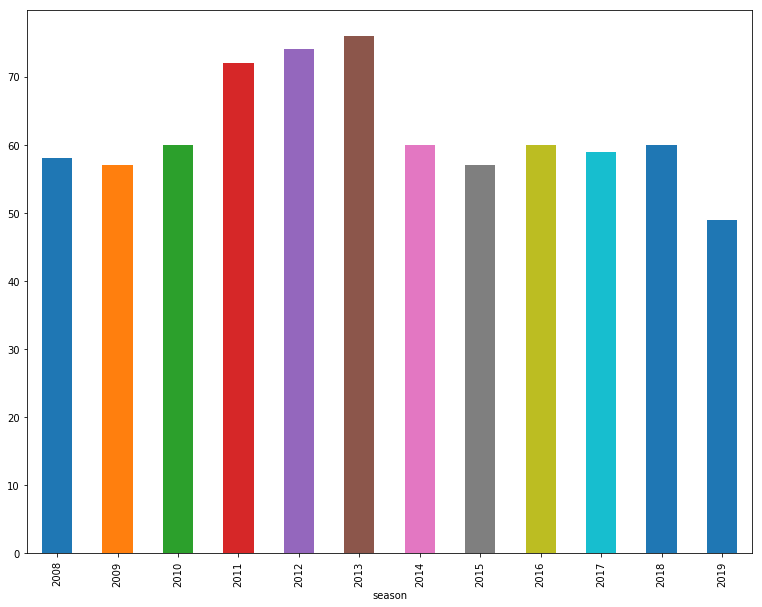

In [20]:
matches = match_data[match_data['win']==1]
matches = matches.groupby('season')
matches = matches['win'].count()
matches
# matches.unstack()
matches.plot(kind='bar', figsize=(13,10))

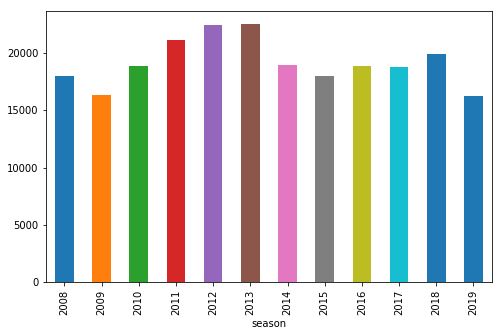

In [21]:
runs = match_data.groupby('season')
runs = runs['runs_scored'].sum()
runs.plot(kind='bar', figsize=(8,5))

So 2012 & 2013 are the two seasons were most number of runs were scored across the whole season

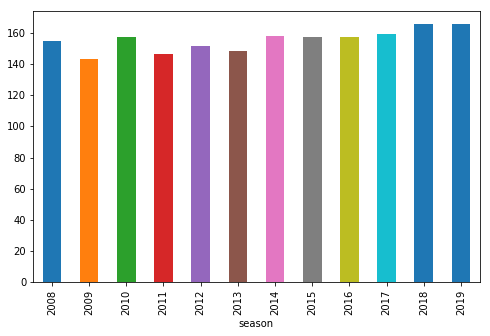

In [22]:
avg_runs = match_data.groupby('season')['runs_scored'].mean()
avg_runs.plot(kind='bar', figsize=(8,5))

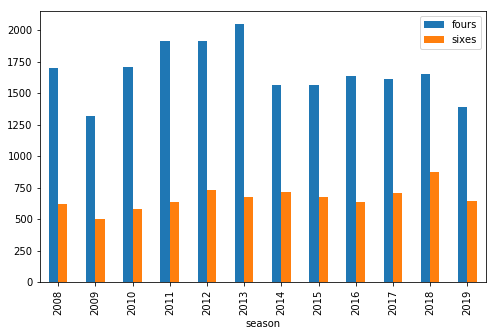

In [23]:
fours_sixes = match_data.groupby('season')
fours_sixes = fours_sixes.apply(lambda x: pd.Series({'fours':sum(x['fours']), 'sixes':sum(x['sixes'])}))
fours_sixes.plot(kind='bar', figsize=(8,5))

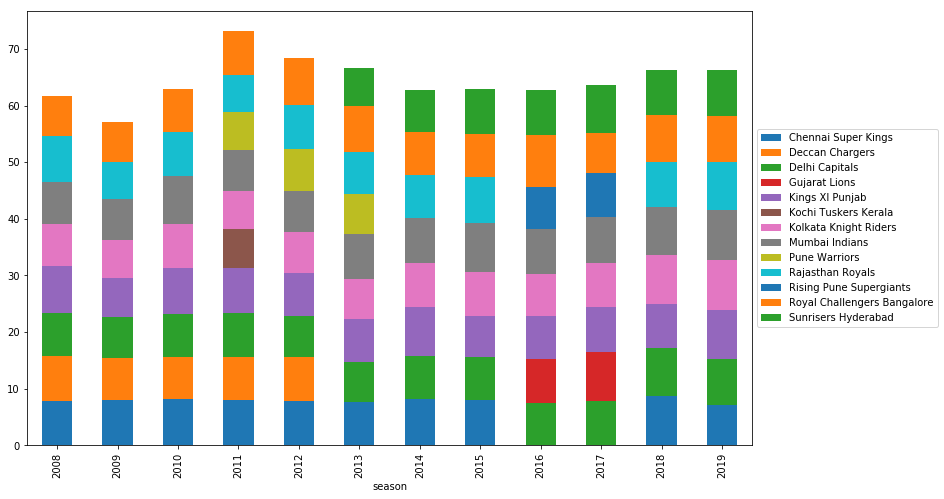

In [24]:
import copy
runs_perover = copy.deepcopy(match_data)
runs_perover['runs_pero'] = runs_perover.runs_scored/20
runs_perover
runs_perover = runs_perover.groupby(['season','name'])
runs_perover = runs_perover['runs_pero'].mean()
# runs_perover
runs_perover.unstack().plot(kind='bar', stacked=True, figsize=(13,8)).legend(loc='center left', bbox_to_anchor=(1,0.5))

## 3. Player Analysis

In [25]:
most_man_of_the_matches = match_data.groupby('man_of_the_match')
most_man_of_the_matches = most_man_of_the_matches['man_of_the_match'].count()
most_man_of_the_matches.argmax()



c:\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until


'CH Gayle'

So Gayle has won the most man of the match awards

## 4. Player Batting stats

We will be looking at the batting stats of Suresh Raina also known as Mr. IPL

In [26]:
def get_batsman_runs(file,batsman):
    count4, count6, runs, balls = 0,0,0,0
    count=0
    out_kind, bowler = '', ''
    with open('processed_data/innings/' + file, 'r') as inn:
#         print('in function')
        try:
            inns = json.load(inn)
        except Exception as e:
            return (0,0,0,0,'','')
        
        
        for over in inns:
            count+=1
            for ball, ball_details in over.items():
                if ball_details['batsman'] == 'SK Raina':
                    if ('wicket' in ball_details and ball_details['wicket']['player_out']=='SK Raina'):
                        balls+=1
                        out_kind= ball_details['wicket']['kind']
                        bowler = ball_details['bowler']
#                         print(out_kind, bowler)
                        return (runs, balls, count4, count6, out_kind, bowler)
                    else:
                        runs += ball_details['runs']['batsman']
                        if ball_details['runs']['batsman']==4:
                            count4 +=1
                        elif ball_details['runs']['batsman']==6:
                            count6 +=1
                        balls+=1
                                
                
                
        return (runs, balls, count4, count6, out_kind, bowler)
                
                    
                    
                
        

In [27]:
columns = ['against','match_win','runs','balls_taken','fours','sixes','out_kind','bowler','date','season']
mr_ipl_data = pd.DataFrame()
for f in os.listdir('processed_data/matches'):
    file = 'processed_data/matches/'+ f
    with open(file, 'r') as rf:
        data = json.load(rf)
        if data['team1']=='Chennai Super Kings' or data['team2'] =='Chennai Super Kings' or data['team1']=='Gujarat Lions' or data['team2']=='Gujarat Lions':
            inn_id = data['id']
            mr_ipl_tmp = []
            if data['team1']!='Chennai Super Kings' and data['team1']!='Gujarat Lions':
                mr_ipl_tmp.append(data['team1'])
            elif data['team2']!='Chennai Super Kings' and data['team2']!='Gujarat Lions':
                mr_ipl_tmp.append(data['team2'])
                
            if data['winner']=='Chennai Super Kings' or data['winner']=='Gujarat Lions':
                mr_ipl_tmp.append(1)
            else:
                mr_ipl_tmp.append(0)
                
            if data['toss_winner']=='Chennai Super Kings' and data['toss_decision']=='bat':
                inn_file = inn_id + '_1st_inn.json'
            elif data['toss_winner']=='Gujarat Lions' and data['toss_decision']=='bat':
                inn_file = inn_id + '_1st_inn.json'
            elif data['toss_winner']=='Gujarat Lions' and data['toss_decision']=='field':
                inn_file = inn_id + '_2nd_inn.json'
            elif data['toss_winner']=='Chennai Super Kings' and data['toss_decision']=='field':
                inn_file = inn_id + '_2nd_inn.json'
            elif (data['toss_winner']!='Chennai Super Kings' or data['toss_winner']!='Gujarat Lions') and data['toss_decision']=='field':
                inn_file = inn_id + '_1st_inn.json'
            elif (data['toss_winner']!='Chennai Super Kings' or data['toss_winner']!='Gujarat Lions') and data['toss_decision']=='bat':
                inn_file = inn_id + '_2nd_inn.json'
            
                
#             print(inn_file)
            runs, balls_taken, fours, sixes, out_kind, bowler = get_batsman_runs(inn_file, 'SK Raina')
#             print(runs,balls_taken, fours, sixes, out_kind, bowler)
            if out_kind == '':
                out_kind = 'not out'
            mr_ipl_tmp.append(runs)
            mr_ipl_tmp.append(balls_taken)
            mr_ipl_tmp.append(fours)
            mr_ipl_tmp.append(sixes)
            mr_ipl_tmp.append(out_kind)
            mr_ipl_tmp.append(bowler)
            
            mr_ipl_tmp.append(data['date'])
            mr_ipl_tmp.append(data['date'].split('-')[0])
            
            mr_ipl_data = mr_ipl_data.append(pd.Series(mr_ipl_tmp, index=columns), ignore_index=True)
            
                
            
            
            

In [28]:
mr_ipl_data.head(20)

,against,balls_taken,bowler,date,fours,match_win,out_kind,runs,season,sixes
0,Kolkata Knight Riders,52.0,,2017-04-07,7.0,0.0,not out,68.0,2017,0.0
1,Sunrisers Hyderabad,8.0,Rashid Khan,2017-04-09,0.0,0.0,lbw,5.0,2017,0.0
2,Rising Pune Supergiant,23.0,,2017-04-14,4.0,1.0,not out,35.0,2017,1.0
3,Mumbai Indians,29.0,Harbhajan Singh,2017-04-16,2.0,0.0,caught,28.0,2017,0.0
4,Royal Challengers Bangalore,8.0,YS Chahal,2017-04-18,2.0,0.0,caught,23.0,2017,2.0
5,Kolkata Knight Riders,46.0,Kuldeep Yadav,2017-04-21,9.0,1.0,caught,84.0,2017,4.0
6,Kings XI Punjab,24.0,AR Patel,2017-04-23,4.0,0.0,caught,32.0,2017,0.0
7,Royal Challengers Bangalore,31.0,,2017-04-27,4.0,1.0,not out,34.0,2017,1.0
8,Mumbai Indians,3.0,JJ Bumrah,2017-04-29,0.0,0.0,caught,1.0,2017,0.0
9,Rising Pune Supergiant,8.0,Imran Tahir,2017-05-01,0.0,0.0,run out,7.0,2017,0.0


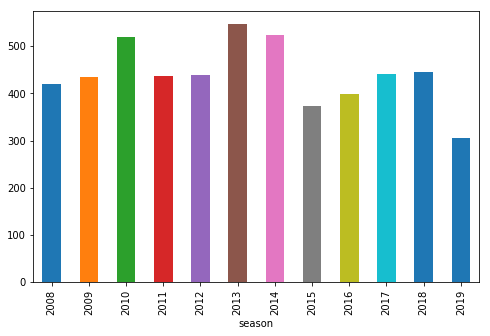

In [29]:
runs_across_seasons = mr_ipl_data.groupby('season')
runs_across_seasons = runs_across_seasons['runs'].sum()
runs_across_seasons.plot(kind='bar',figsize=(8,5))

So Mr. IPL has been performing consistently, scoring 350+ runs in every season. (you can ignore 2019 as when I downloaded the data few matches were still left for him to play)

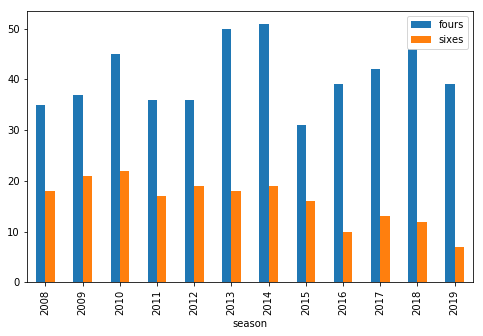

In [30]:
fours_sixes = mr_ipl_data.groupby('season')
fours_sixes = fours_sixes.apply(lambda x: pd.Series({'fours':sum(x['fours']), 'sixes':sum(x['sixes'])}))
fours_sixes.plot(kind='bar', figsize=(8,5))

Looks like 2013 adnd 2014 were the best of the seasons for Mr. IPL considering runs and boundaries

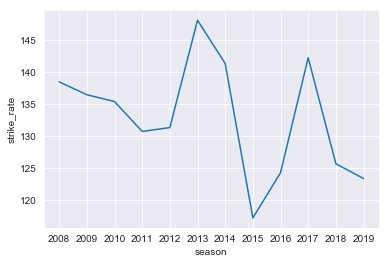

season
2008    138.486842
2009    136.477987
2010    135.416667
2011    130.746269
2012    131.343284
2013    148.108108
2014    141.351351
2015    117.241379
2016    124.299065
2017    142.258065
2018    125.706215
2019    123.387097
dtype: float64

In [31]:
strike_rate = mr_ipl_data.groupby('season')
strike_rate = strike_rate.apply(lambda x: (sum(x['runs'])/sum(x['balls_taken']))*100 )

season = list(strike_rate.index)
strikerate = list(strike_rate)

strike_rate_data = pd.DataFrame({'season':season, 'strike_rate':strikerate})

sns.set_style('darkgrid')
sns.lineplot(x='season',y='strike_rate', data=strike_rate_data)
plt.show()
strike_rate

So, 2013 and 2014 were not only good in terms of runs but also strike rate, which is quite obvious actually

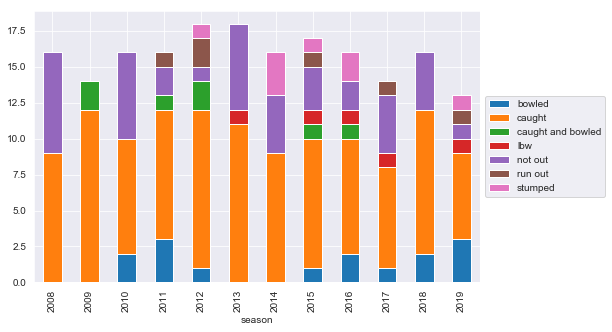

In [32]:
out_kind = mr_ipl_data.groupby(['season','out_kind'])
out_kind = out_kind['out_kind'].count()
out_kind.unstack().plot(kind='bar',stacked=True, figsize=(8,5)).legend(loc='center left', bbox_to_anchor=(1,0.5))

Interesting!! He oftens gets catch out.

In [50]:
out_data = mr_ipl_data[mr_ipl_data['bowler']!='']
bowler = out_data.groupby('bowler')
bowler = bowler['bowler'].count()
bowler.argmax(), bowler.max()

c:\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


('Harbhajan Singh', 5)

So ya, Harbhajan is the one who is got him out most number of times i.e. 5.

## 3. Bowler Analysis

In [82]:
def fill_inn_wickets(file, season):
    global bowler_wickets
    with open('processed_data/innings/' + file, 'r') as rf:
        try:
            data = json.load(rf)
            for ball_details in data:
                for k, v in ball_details.items():
                    if 'wicket' in v:
                        if v['wicket']['kind']!='run out':
                            bowler = v['bowler']
    #                         print(bowler_wickets, v['wicket'], season)
#                             print(bowler, season)
                            if bowler in bowler_wickets:
                                if season in bowler_wickets[bowler]:
                                    bowler_wickets[bowler][season]+=1
                                else:
                                    tmp_dict = bowler_wickets[bowler]
                                    tmp_dict[season]=1
                                    bowler_wickets[bowler] = tmp_dict
                            else:
                                bowler_wickets[bowler] = {season:1}
        except Exception as e:
            pass


In [83]:
%%time
columns = ['bowler','season','wickets']
bowler_wickets = dict()
for file in os.listdir('processed_data/matches/'):
    with open('processed_data/matches/' + file, 'r') as rf:
        data = json.load(rf)
        season = data['date'].split('-')[0]
        inn_id = data['id']
        inn_file1 = inn_id + '_1st_inn.json'
        inn_file2 = inn_id + '_2nd_inn.json'
        fill_inn_wickets(inn_file1, season)
        fill_inn_wickets(inn_file2, season)
        

Wall time: 1.87 s


In [84]:
bowler_wickets

{'A Ashish Reddy': {'2012': 11, '2013': 3, '2015': 3, '2016': 1},
 'A Chandila': {'2012': 5, '2013': 6},
 'A Choudhary': {'2017': 5},
 'A Flintoff': {'2009': 2},
 'A Kumble': {'2008': 7, '2009': 21, '2010': 17},
 'A Mishra': {'2008': 11,
  '2009': 14,
  '2010': 17,
  '2011': 19,
  '2012': 13,
  '2013': 21,
  '2014': 7,
  '2015': 9,
  '2016': 13,
  '2017': 10,
  '2018': 12,
  '2019': 6},
 'A Mithun': {'2010': 1, '2011': 5, '2013': 1},
 'A Nehra': {'2008': 12,
  '2009': 19,
  '2010': 6,
  '2012': 11,
  '2013': 11,
  '2014': 8,
  '2015': 22,
  '2016': 9,
  '2017': 8},
 'A Nel': {'2008': 1},
 'A Singh': {'2009': 9, '2011': 9, '2012': 10},
 'A Symonds': {'2009': 7, '2010': 12, '2011': 1},
 'A Uniyal': {'2010': 2},
 'A Zampa': {'2016': 12, '2017': 7},
 'AA Chavan': {'2012': 7, '2013': 1},
 'AA Jhunjhunwala': {'2012': 1},
 'AA Noffke': {'2008': 1},
 'AB Agarkar': {'2008': 8, '2009': 6, '2010': 4, '2011': 8, '2012': 3},
 'AB Dinda': {'2008': 9,
  '2009': 4,
  '2010': 9,
  '2011': 5,
  '2012': 

In [85]:
wickets_data = pd.DataFrame(bowler_wickets)

In [91]:
wickets_data.head(20)

,A Ashish Reddy,A Chandila,A Choudhary,A Flintoff,A Kumble,A Mishra,A Mithun,A Nehra,A Nel,A Singh,...,WPUJC Vaas,Washington Sundar,Y Nagar,Y Prithvi Raj,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
2008,NaN,NaN,NaN,NaN,7.0,11,NaN,12.0,1.0,NaN,...,5.0,NaN,NaN,NaN,2.0,NaN,8.0,NaN,3.0,14.0
2009,NaN,NaN,NaN,2.0,21.0,14,NaN,19.0,NaN,9.0,...,4.0,NaN,2.0,NaN,4.0,14.0,7.0,NaN,6.0,6.0
2010,NaN,NaN,NaN,NaN,17.0,17,1.0,6.0,NaN,NaN,...,9.0,NaN,1.0,NaN,NaN,1.0,5.0,NaN,5.0,15.0
2011,NaN,NaN,NaN,NaN,NaN,19,5.0,NaN,NaN,9.0,...,NaN,NaN,1.0,NaN,NaN,NaN,13.0,NaN,9.0,14.0
2012,11.0,5.0,NaN,NaN,NaN,13,NaN,11.0,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,17.0
2013,3.0,6.0,NaN,NaN,NaN,21,1.0,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.0,5.0
2014,NaN,NaN,NaN,NaN,NaN,7,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,5.0,5.0
2015,3.0,NaN,NaN,NaN,NaN,9,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,23.0,1.0,7.0
2016,1.0,NaN,NaN,NaN,NaN,13,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21.0,NaN,10.0
2017,NaN,NaN,5.0,NaN,NaN,10,NaN,8.0,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,1.0,14.0,1.0,10.0


In [100]:
wickets_data.idxmax(axis=1), wickets_data.max(axis=1)

(2008    Sohail Tanvir
 2009         RP Singh
 2010          PP Ojha
 2011       SL Malinga
 2012         M Morkel
 2013         DJ Bravo
 2014        MM Sharma
 2015         DJ Bravo
 2016          B Kumar
 2017          B Kumar
 2018           AJ Tye
 2019         K Rabada
 dtype: object, 2008    22.0
 2009    23.0
 2010    21.0
 2011    28.0
 2012    25.0
 2013    32.0
 2014    23.0
 2015    26.0
 2016    23.0
 2017    26.0
 2018    24.0
 2019    25.0
 dtype: float64)

Interestingly, almost every year we have some new bowler who is the highest wicket taker. This shows that consistency is something very difficult for a bowler in IPL. Bravo and B Kumar are the only ones who have been two times highest wicket takers.